In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
#imports
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.tokenize import RegexpTokenizer
import string 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, RobustScaler
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from scipy.misc import imread
#from wordcloud import WordCloud, STOPWORDS
#pd.set_option('max_rows',1000000)
#pd.set_option('max_columns',10000)
sns.set(rc={'figure.figsize':(15,10)})
#import spacy
#df = pd.read_csv('/kaggle/input/mbti-type/mbti_1.c

In [26]:
df = pd.read_csv("mbti_1.csv")
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [8]:
df.shape

(8675, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 4 columns):
type                       8675 non-null object
posts                      8675 non-null object
words_per_comment          8675 non-null float64
variance_of_word_counts    8675 non-null float64
dtypes: float64(2), object(2)
memory usage: 271.2+ KB


In [29]:
# Groupby the 'type' column and count them
person_df = df.groupby('type').count()
# sort the values  in the 'post' column in ascending order, then instantiate it back to the original dataframe and assign it to a variable
person_df.sort_values('posts', ascending=False, inplace=True)
# check the 'person_df' dataframe
person_df

,posts
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


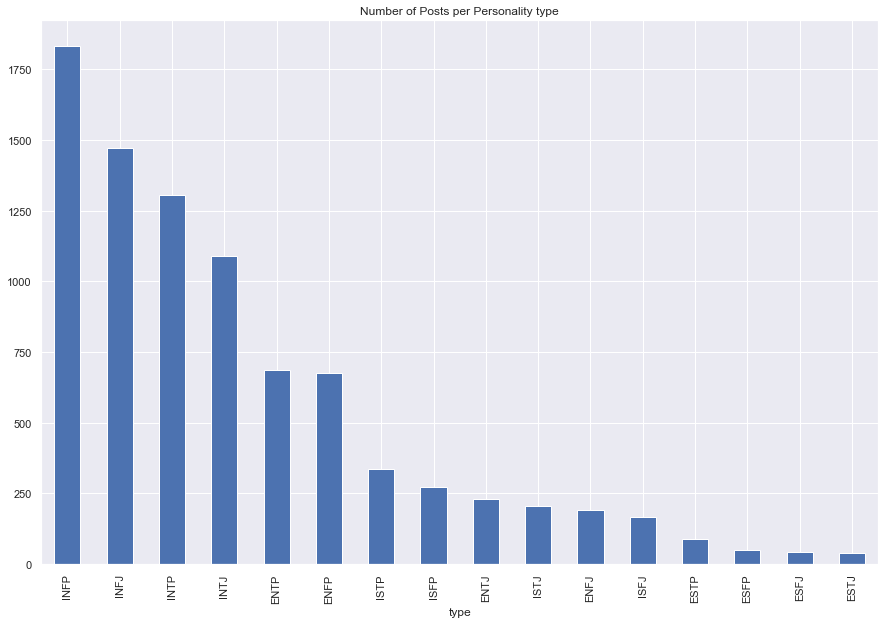

In [39]:
# use bar chart to plot the no of 'posts' against the type of personality
plt.figure(figsize=(15,10))
person_df['posts'].plot(kind='bar', title="Number of Posts per Personality type");


In [32]:
# create a function to get the variance of each row in the post col
def var_row(row):
    lst = [] # create an empty list
    for i in row.split('|||'): # Iterate through each row and split by '|||'
        lst.append(len(i.split())) # append the length of the splitted 'i' into the empty list
    return np.var(lst) # Get the numpy variance of the appended list

# use lambda to get the length of splitted x and divide by 50, apply it to df['posts'] and assign it to a variable
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50) 

# use lambda to instantiate the function created above by passing 'x' used above as the argument, 
# apply it to df['posts'] and assign it to a variable
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
# check the head of the dataframe
df.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


In [34]:
df.describe()

,words_per_comment,variance_of_word_counts
count,8675.000000,8675.000000
mean,24.524830,137.209864
std,6.224211,48.285206
min,0.080000,0.000000
25%,20.930000,105.481800
50%,25.560000,140.330000
75%,29.140000,170.478384
max,37.620000,313.290000


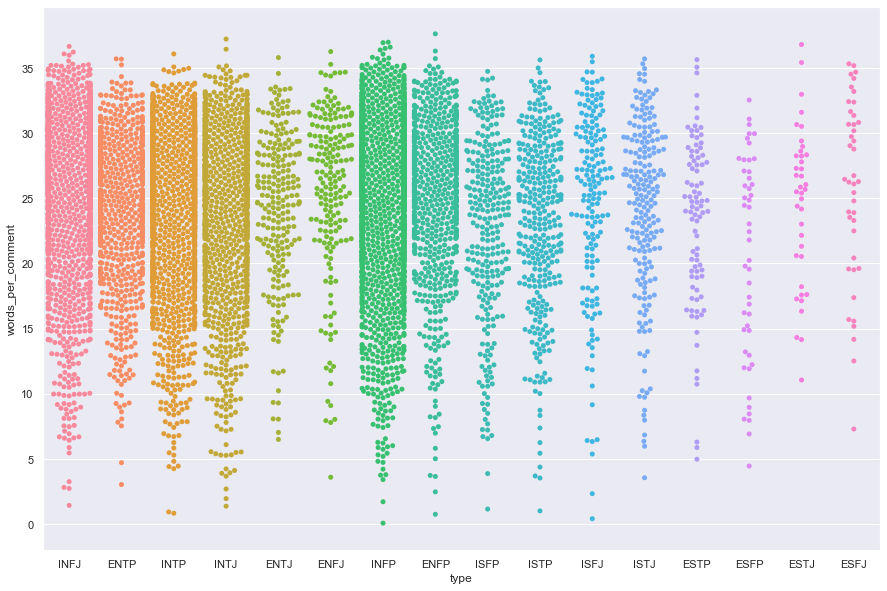

In [38]:
# Use seaborn to plot a swamplot of the 'type' vs 'words_per_comment' to get a better representation distribution of the values
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df);

In [20]:
# groupby the 'tpe' col and get the aggregate of the type and the count of each type in a dataframe
df.groupby('type').agg({'type':'count'})

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


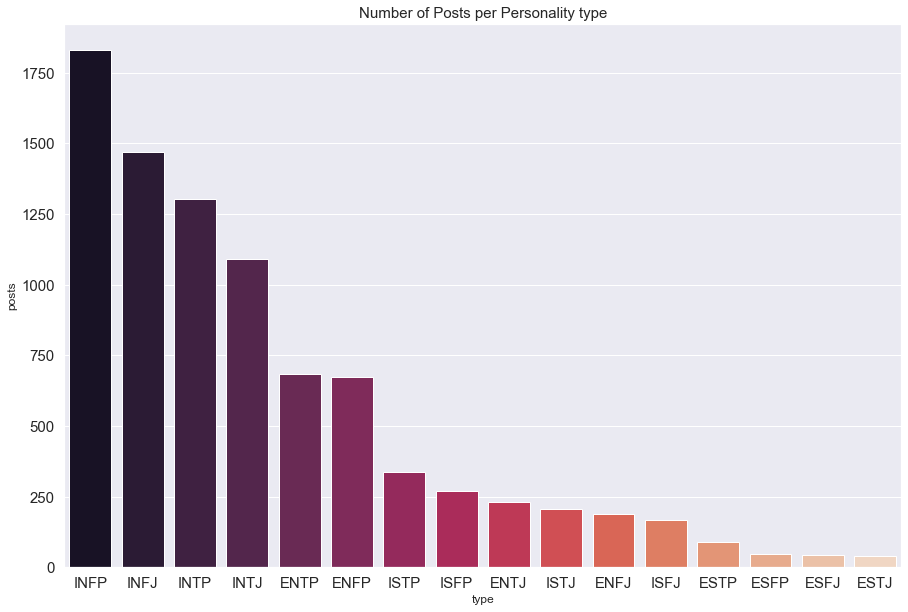

In [21]:
sns.barplot(x=person_df.index,y='posts',data=person_df,palette='rocket')
plt.title('Number of Posts per Personality type',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

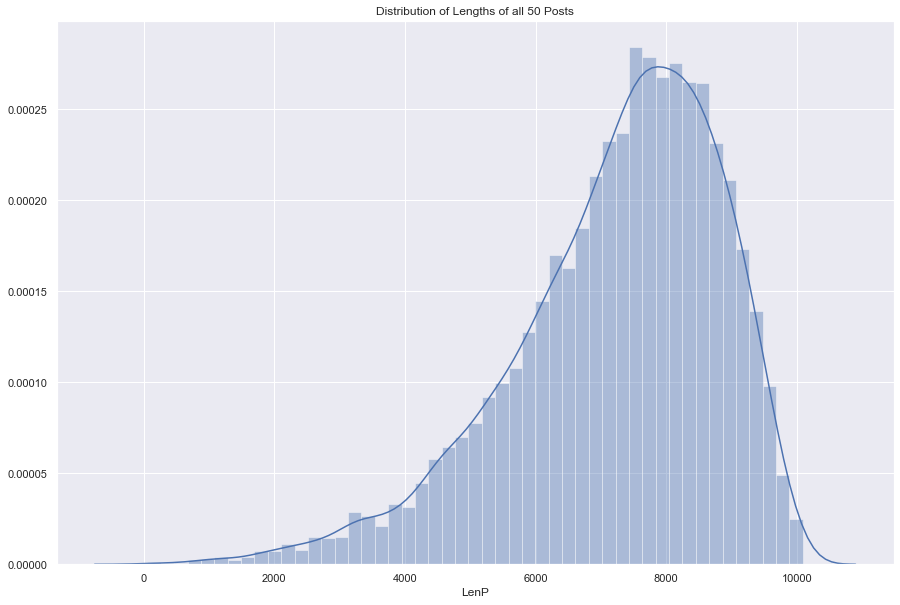

In [35]:
## Visualize the distribution of the length of posts
df["LenP"] = df["posts"].apply(len)
sns.distplot(df["LenP"]).set_title("Distribution of Lengths of all 50 Posts");

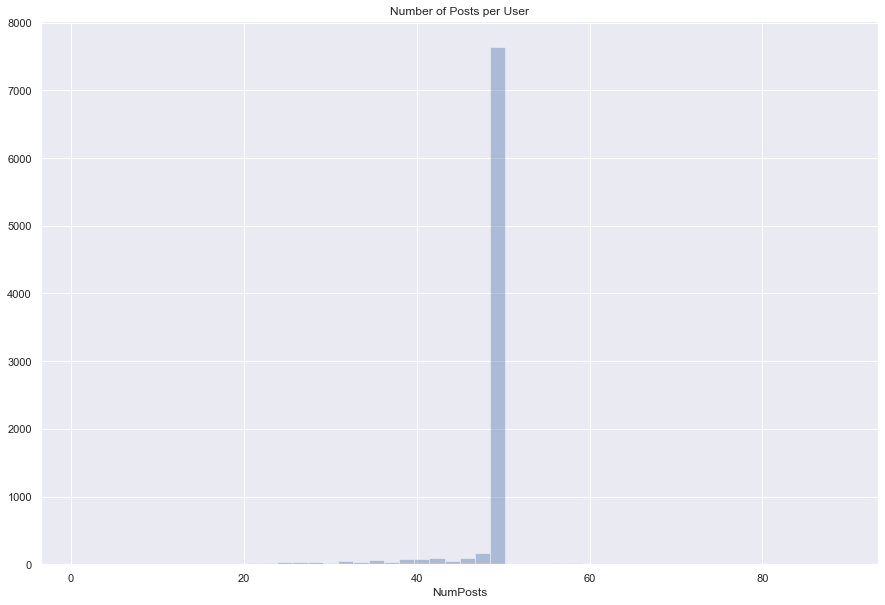

In [37]:
# Visualizing the num of posts made, by first getting the length of x, splitted by |||.
df["NumPosts"] = df["posts"].apply(lambda x: len(x.split("|||")))

sns.distplot(df["NumPosts"], kde=False).set_title("Number of Posts per User");

In [44]:
df.head()

,type,posts,words_per_comment,variance_of_word_counts,LenP,NumPosts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,4652,50
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,7053,50
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,5265,50
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,6271,50
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,6111,50


In [46]:
#Create a function that accpts two parameters
def extract(posts, new_posts):
    # iterate through posts by indexing in the main df to instantiate it to the parameter 'posts' in the extract function,
    # while looping through, split by (|||)
    for post in posts[1].split("|||"):
        # apply the split method to the rows of the 'posts' col and append to the second parameter 'new_posts' in extract func
        new_posts.append((posts[0], post))
# create an empty list and instantiate it to the variable 'posts'
posts = []
# apply the extract func with 'x' and 'posts' passed in as the arguments at the column axis
df.apply(lambda x: extract(x, posts), axis=1)
# print out the length of the observations in the dataframe
print("Number of users", len(df))
# print out the length of the observations in the splitted results in the rows of the 'posts'
print("Number of posts", len(posts))

Number of users 8675
Number of posts 422845


In [51]:
posts[:5]

[('INFJ', "'http://www.youtube.com/watch?v=qsXHcwe3krw"),
 ('INFJ', 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg'),
 ('INFJ',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks'),
 ('INFJ', 'What has been the most life-changing experience in your life?'),
 ('INFJ',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.')]

In [79]:
#  mask the 'type' col to (['ESFJ','ESFP','ESTJ','ESTP']) and assign to a variable
df_2 = df[~df['type'].isin(['ESFJ','ESFP','ESTJ','ESTP'])]
# count how many 'http' per comments are found in the rows of posts column in the masked dataframe
df_2['http_per_comment'] = df_2['posts'].apply(lambda x: x.count('http')/50)
# count how many '?'per comments are found in the rows of posts column in the masked dataframe
df_2['qm_per_comment'] = df_2['posts'].apply(lambda x: x.count('?')/50)
# limit ur result to the default 5 observations by using head() func of a dataframe
df_2.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,type,posts,words_per_comment,variance_of_word_counts,LenP,NumPosts,http_per_comment,qm_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,4652,50,0.48,0.36
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,7053,50,0.20,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,5265,50,0.10,0.24
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,6271,50,0.04,0.22
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,6111,50,0.12,0.20


In [53]:
# print out the mean() of the aggregate of ''http_per_comment'' and 'qm_per_comment' 
# group them by the 'type' col of the masked dataframe
print(df_2.groupby('type').agg({'http_per_comment': 'mean'}))
print(df_2.groupby('type').agg({'qm_per_comment': 'mean'}))

      http_per_comment
type                  
ENFJ          0.053263
ENFP          0.050459
ENTJ          0.053160
ENTP          0.048263
INFJ          0.065878
INFP          0.075426
INTJ          0.063593
INTP          0.070767
ISFJ          0.070602
ISFP          0.088339
ISTJ          0.061171
ISTP          0.081009
      qm_per_comment
type                
ENFJ        0.213053
ENFP        0.227259
ENTJ        0.240000
ENTP        0.220964
INFJ        0.208966
INFP        0.202533
INTJ        0.214849
INTP        0.221580
ISFJ        0.200964
ISFP        0.216384
ISTJ        0.214927
ISTP        0.221602


<Figure size 1080x720 with 0 Axes>

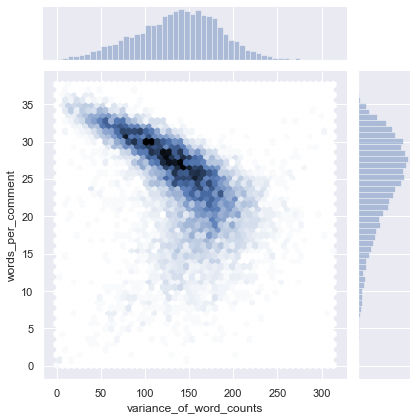

In [56]:
# use a seaborn 'jointplot' to visualize the "variance_of_word_counts" and "words_per_comment" in the main df
plt.figure(figsize=(15,10))
sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_2, kind="hex");

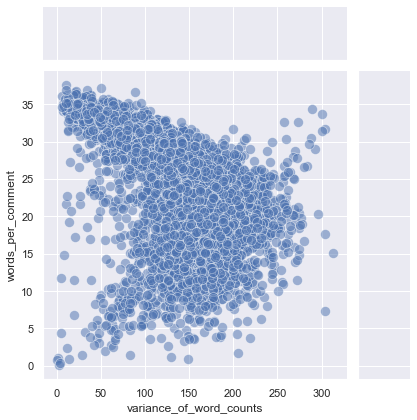

In [67]:
# To get a clearer picture, ill use a seaborn JointGrid
g = sns.JointGrid(data=df, x="variance_of_word_counts", y="words_per_comment")
g.plot_joint(sns.scatterplot, s=100, alpha=.5);

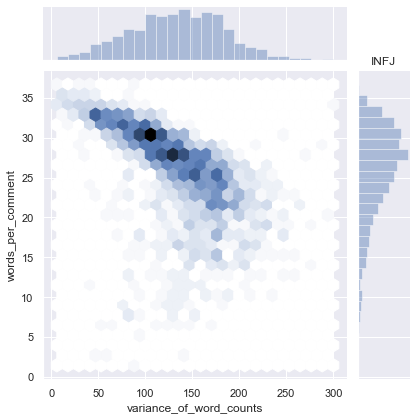

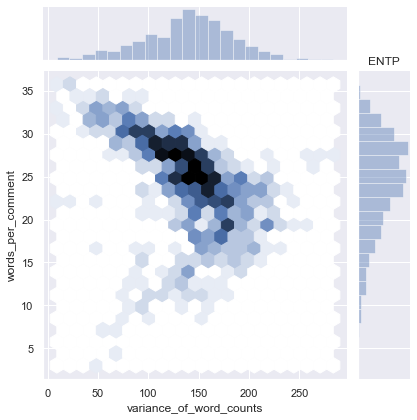

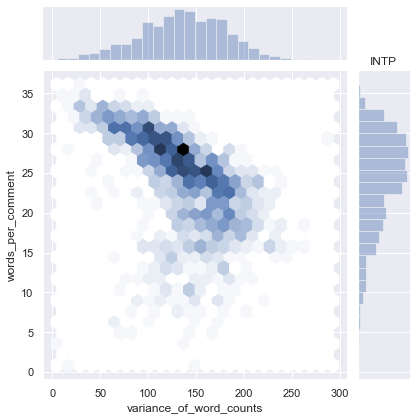

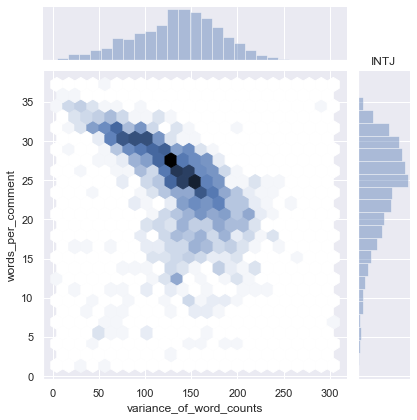

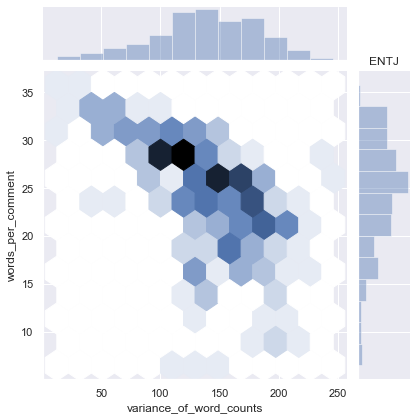

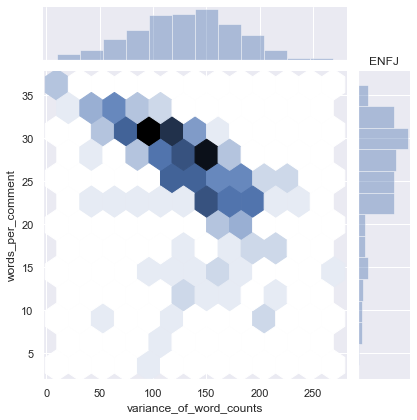

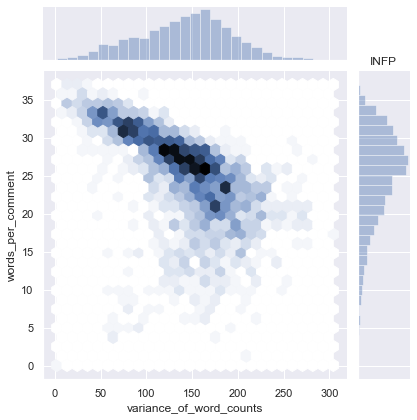

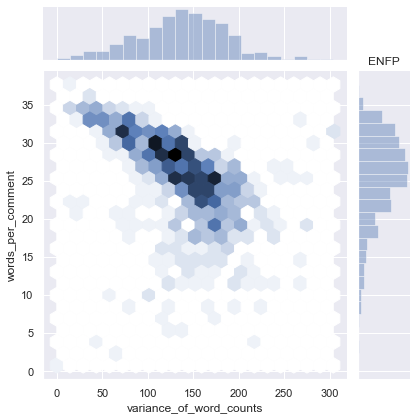

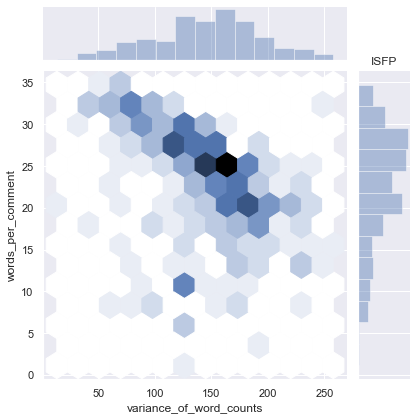

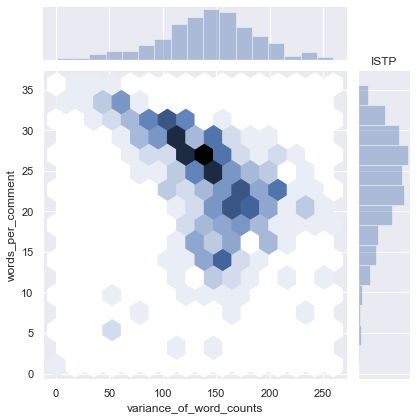

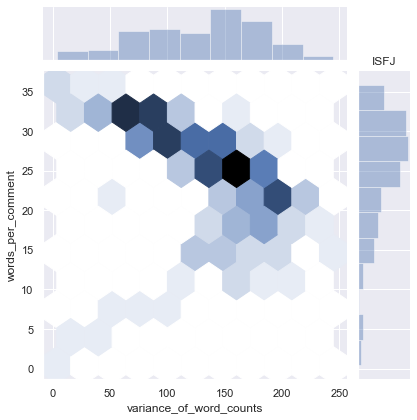

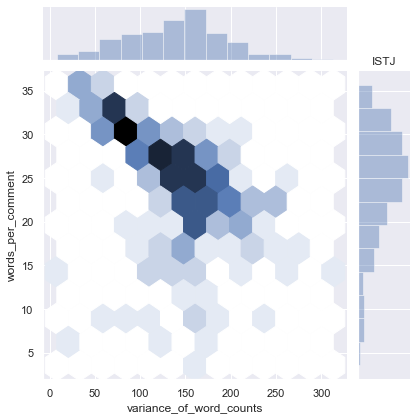

In [68]:
# create a 'plot_jointplot' function that holds 3 parameters
def plot_jointplot(mbti_type, axs, titles):
    # create another sub_dataframe that masks the 'type' col to check which type eqauls the 'mbti_type' and assign to a variable
    df_3 = df_2[df_2['type'] == mbti_type]
    # use a seaborn 'jointplot' to visualize the "variance_of_word_counts" and "words_per_comment" in the main df
    sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_3, kind="hex", ax = axs, title = titles)
# use the unique() func to check how many are unique in the 'df_2['type']' sub dataframe    
i = df_2['type'].unique()
#assign zero to variable
k = 0
# use a for loop to iterate with 'm' in a range of (0 to 1, not upto 2)
for m in range(0,2):
    # Iterate in the above for loop with 'n' in the range 0f (0 to 5, not upto 6)
    for n in range(0,6):
        # create another sub_dataframe that masks the 'type' col to check which type eqauls the 'i[k]'
        df_3 = df_2[df_2['type'] == i[k]]
        # use a seaborn 'jointplot' to visualize the "variance_of_word_counts" and "words_per_comment" in the main df
        sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_3, kind="hex")
        # use the title attribute with 'i[k]' as an argument to add a title to the plot
        plt.title(i[k])
        # increment 'k' by 1
        k+=1

###### N/b: Jointplots are more flexible, but JointGrid are clearer, 
###### the JointGrid looks alike across the masked dataframe of the unique mbti_types, while the jointplots show slight differences

###### ENFJ has highest variance of word count and fewr word per_comment

In [75]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


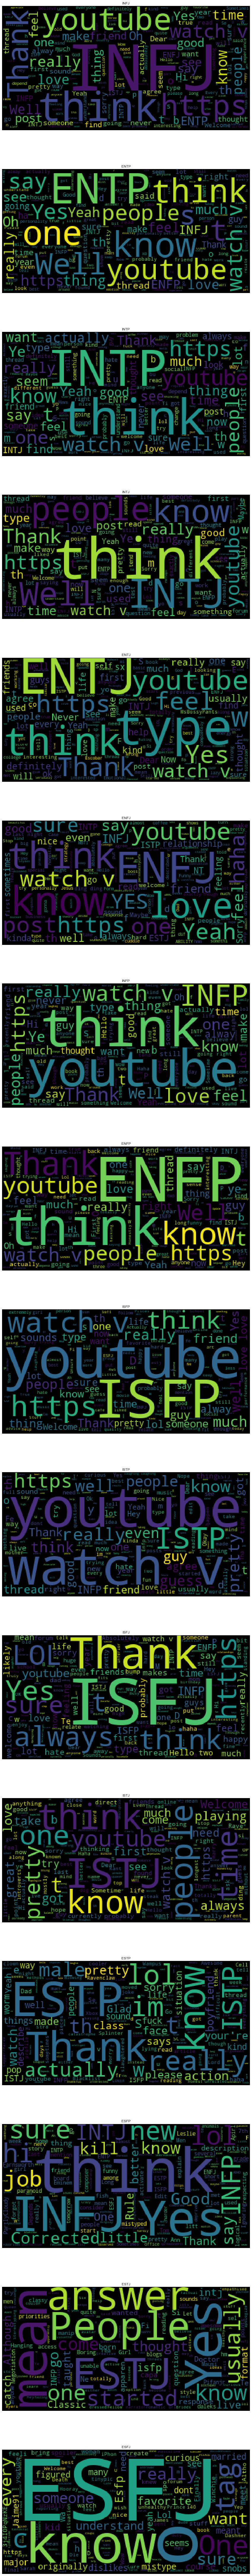

In [76]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS
# get the subplots of the length of each unique attribute in the df['type'] and 
# include a figsize that has the unique length of df['type'] as an argument
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,10*len(df['type'].unique())))

# instantiate zero to a variable
k = 0
# use a for loop to loop through the unique entries in df['type']
for i in df['type'].unique():
    # create a sub_dataframe that subsets the original 'type' dataframe to just the unique entries in the 'type'
    df_4 = df[df['type'] == i]
    # use the imported 'WordCloud' to generate(the posts of the subsetted dataframe and convert them into a string)
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    # assign the 'wordcloud' generated to the ax[k] plot
    ax[k].imshow(wordcloud)
    # set the title in the plot
    ax[k].set_title(i)
    # remove axis
    ax[k].axis("off")
    # increment k by 1
    k+=1

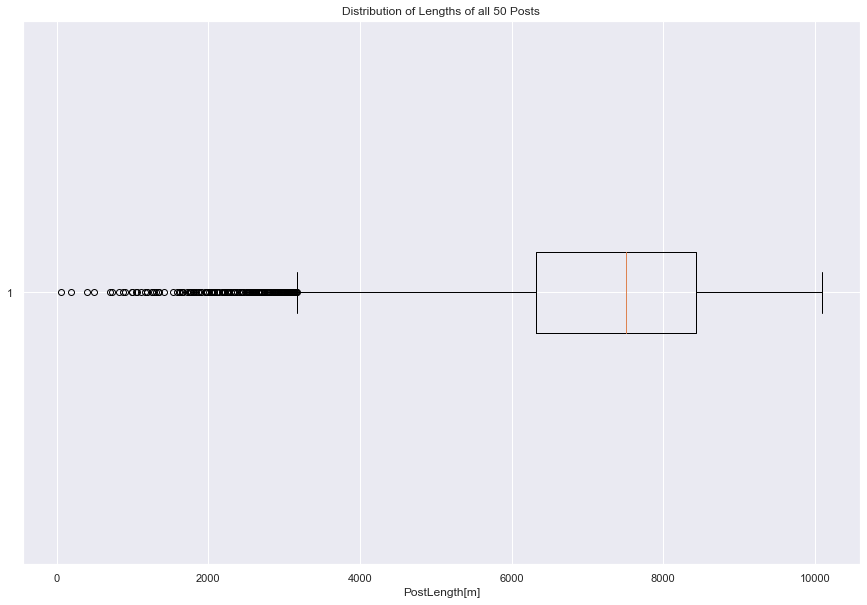

In [81]:
## To check for outliers because from my previous visualisation above, the plot was skewed to one side
plt.boxplot(df['LenP'], vert=False)
plt.xlabel('PostLength[m]')
plt.title("Distribution of Lengths of all 50 Posts");

In [ ]:
#### Above it shows that there is a huge outlier in the boxplot, stating that the length of post is skewed to the left side,
#### This means ill exclude the outlier values from my analysis.